In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
import imageio
import matplotlib.pyplot as plt
import BodyTracker as Bt
from utils import *
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim
import random


numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject


## V2

In [2]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
def detectPose(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

        return image



In [4]:

def detectRIGHTLegPose(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #print(results.pose_landmarks.landmark)

        # Create an empty NormalizedLandmarkList object
        landmark_list = mp.framework.formats.landmark_pb2.NormalizedLandmarkList()

        # Create 22 NormalizedLandmark objects
        for _ in range(33):
            landmark = landmark_list.landmark.add()
            landmark.Clear()
            landmark.x = 0
            landmark.y = 0
            landmark.z = 0
            landmark.visibility = 0

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility
        # Render detections
        mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

        return image

In [24]:
def trackJoints(img):

    if img is None:
        return None
        
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
        lmList = []
        try:
            landmarks = results.pose_landmarks.landmark
            for id, lm in enumerate(results.pose_landmarks.landmark):
                h, w, c = img.shape
                # print(id, lm)
                cx, cy = int(lm.x * w), int(lm.y * h)
                #cx, cy = lm.x, lm.y
                lmList.append([id, cx, cy])
            #print(landmarks)
        except:
            pass
        
        return lmList

In [6]:

def trackRIGHTLegJoints(joints):
    
    lmList = []
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_HIP])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_KNEE])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_ANKLE])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_HEEL])
    lmList.append(joints[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX])
    return lmList

In [7]:
# a:first point b:middle point c:last point
def detectAngles(a, b, c):

    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [132]:
v1 = "videos/PLANK1.mp4"
v2 = "videos/PLANK4.mp4"
v3 = "videos/new1.mp4"

In [133]:
nbrFrames1 = 116

In [134]:
cap=cv2.VideoCapture(v1)
keypoints1 = []
RIGHTHandKeypoints1 = []
while cap.isOpened():
    ret, frame = cap.read()

    if frame is None:
        break
    
    #frame = cv2.resize(frame, (1200, 600))


   
    landmarks = trackJoints(frame)
    handLandmarks = trackRIGHTLegJoints(landmarks)
    keypoints1.append(landmarks)
    RIGHTHandKeypoints1.append(handLandmarks)

cap.release()
cv2.destroyAllWindows()  

In [135]:
cap=cv2.VideoCapture(v2)
keypoints2 = []
RIGHTHandKeypoints2 = []
while cap.isOpened():
    ret, frame = cap.read()

    if frame is None:
        break

    #frame = cv2.resize(frame, (1200, 600))
    landmarks = trackJoints(frame)
    handLandmarks = trackRIGHTLegJoints(landmarks)
    keypoints2.append(landmarks)
    RIGHTHandKeypoints2.append(handLandmarks)

cap.release()
cv2.destroyAllWindows()  

In [136]:
allKp1Hand = []
allKp2Hand = []

for i in range(0, len(RIGHTHandKeypoints1)):
    allKp1Hand.append(np.array(RIGHTHandKeypoints1[i]))

for i in range(0, len(RIGHTHandKeypoints2)):
    allKp2Hand.append(np.array(RIGHTHandKeypoints2[i]))


In [137]:
dtwKp1Hand = []
dtwKp2Hand = []

for i in range(0, len(allKp1Hand)):
    dtwKp1Hand.append([[np.double(allKp1Hand[i][0][1]) , np.double(allKp1Hand[i][0][2])],
                        [np.double(allKp1Hand[i][1][1]) ,np.double(allKp1Hand[i][1][2])],
                        [np.double(allKp1Hand[i][2][1]) ,np.double(allKp1Hand[i][2][2])],
                        [np.double(allKp1Hand[i][3][1]) ,np.double(allKp1Hand[i][3][2])],
                        [np.double(allKp1Hand[i][4][1]) ,np.double(allKp1Hand[i][4][2])]])

for i in range(0, len(allKp2Hand)):
    dtwKp2Hand.append([[np.double(allKp2Hand[i][0][1]) , np.double(allKp2Hand[i][0][2])],
                        [np.double(allKp2Hand[i][1][1]) ,np.double(allKp2Hand[i][1][2])],
                        [np.double(allKp2Hand[i][2][1]) ,np.double(allKp2Hand[i][2][2])],
                        [np.double(allKp2Hand[i][3][1]) ,np.double(allKp2Hand[i][3][2])],
                        [np.double(allKp2Hand[i][4][1]) ,np.double(allKp2Hand[i][4][2])]])

dtwKp1Hand = np.array(dtwKp1Hand)
dtwKp2Hand = np.array(dtwKp2Hand) 

In [138]:
dtwKp1Hand[0]

array([[380., 200.],
       [264., 245.],
       [132., 267.],
       [104., 258.],
       [116., 324.]])

In [139]:
print(dtwKp1Hand.shape)
print(dtwKp2Hand.shape)

(230, 5, 2)
(199, 5, 2)


In [140]:
mean_x = np.mean(dtwKp1Hand[:, :, 0])
std_x = np.std(dtwKp1Hand[:, :, 0])
mean_y = np.mean(dtwKp1Hand[:, :, 1])
std_y = np.std(dtwKp1Hand[:, :, 1])

# subtract the mean and divide by the standard deviation for each coordinate
dtwKp1Hand_norm = np.zeros_like(dtwKp1Hand)
dtwKp1Hand_norm[:, :, 0] = (dtwKp1Hand[:, :, 0] - mean_x) / std_x
dtwKp1Hand_norm[:, :, 1] = (dtwKp1Hand[:, :, 1] - mean_y) / std_y

mean_x = np.mean(dtwKp2Hand[:, :, 0])
std_x = np.std(dtwKp2Hand[:, :, 0])
mean_y = np.mean(dtwKp2Hand[:, :, 1])
std_y = np.std(dtwKp2Hand[:, :, 1])

# subtract the mean and divide by the standard deviation for each coordinate
dtwKp2Hand_norm = np.zeros_like(dtwKp2Hand)
dtwKp2Hand_norm[:, :, 0] = (dtwKp2Hand[:, :, 0] - mean_x) / std_x
dtwKp2Hand_norm[:, :, 1] = (dtwKp2Hand[:, :, 1] - mean_y) / std_y

In [141]:
dtwKp2Hand_norm

array([[[ 1.68549892, -1.73974471],
        [ 0.49928146, -0.08969667],
        [-0.69399682,  0.22575369],
        [-0.94818628,  0.03163039],
        [-0.69399682,  1.46328972]],

       [[ 1.71374219, -1.73974471],
        [ 0.51340309, -0.04116585],
        [-0.67987519,  0.29854993],
        [-0.92700382,  0.08016122],
        [-0.70811846,  1.51182055]],

       [[ 1.69255974, -1.7154793 ],
        [ 0.50634227, -0.06543126],
        [-0.68693601,  0.20148828],
        [-0.94818628, -0.01690043],
        [-0.68693601,  1.46328972]],

       ...,

       [[ 1.73492464, -1.69121389],
        [ 0.56988964,  0.2500191 ],
        [-0.63044946,  0.12869204],
        [-0.89169973, -0.13822749],
        [-0.65163191,  1.43902431]],

       [[ 1.73492464, -1.73974471],
        [ 0.56282882,  0.20148828],
        [-0.63751028,  0.12869204],
        [-0.88463892, -0.13822749],
        [-0.66575355,  1.4147589 ]],

       [[ 1.74904628, -1.73974471],
        [ 0.56988964,  0.08016122],
     

In [142]:
distance, paths = dtw_ndim.warping_paths(dtwKp1Hand_norm, dtwKp2Hand_norm)
best_path_Hand = dtw.best_path(paths)
len(best_path_Hand)

230

In [143]:
distance

15.125380841412744

In [20]:
paths

array([[ 0.        ,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,  1.82259787,  2.61810194, ..., 16.12764357,
        16.23308406, 16.3379705 ],
       [        inf,  2.43883774,  2.47494406, ..., 14.18580402,
        14.27832675, 14.37026206],
       ...,
       [        inf, 12.9423637 , 12.40345906, ...,  8.97213465,
         9.01770152,  9.05564678],
       [        inf, 12.9671001 , 12.42658017, ...,  8.98740829,
         9.02191421,  9.07073608],
       [        inf, 12.99299983, 12.44995421, ...,  9.00623979,
         9.03122038,  9.0681538 ]])

In [21]:
model_points = dtwKp1Hand/ np.linalg.norm(dtwKp1Hand)
input_points = dtwKp2Hand/np.linalg.norm(dtwKp2Hand)

In [22]:
d, paths = dtw_ndim.warping_paths(model_points, input_points)
print(d)
s = int(100 - (d* 100))
print(s)

0.6500228241870643
34


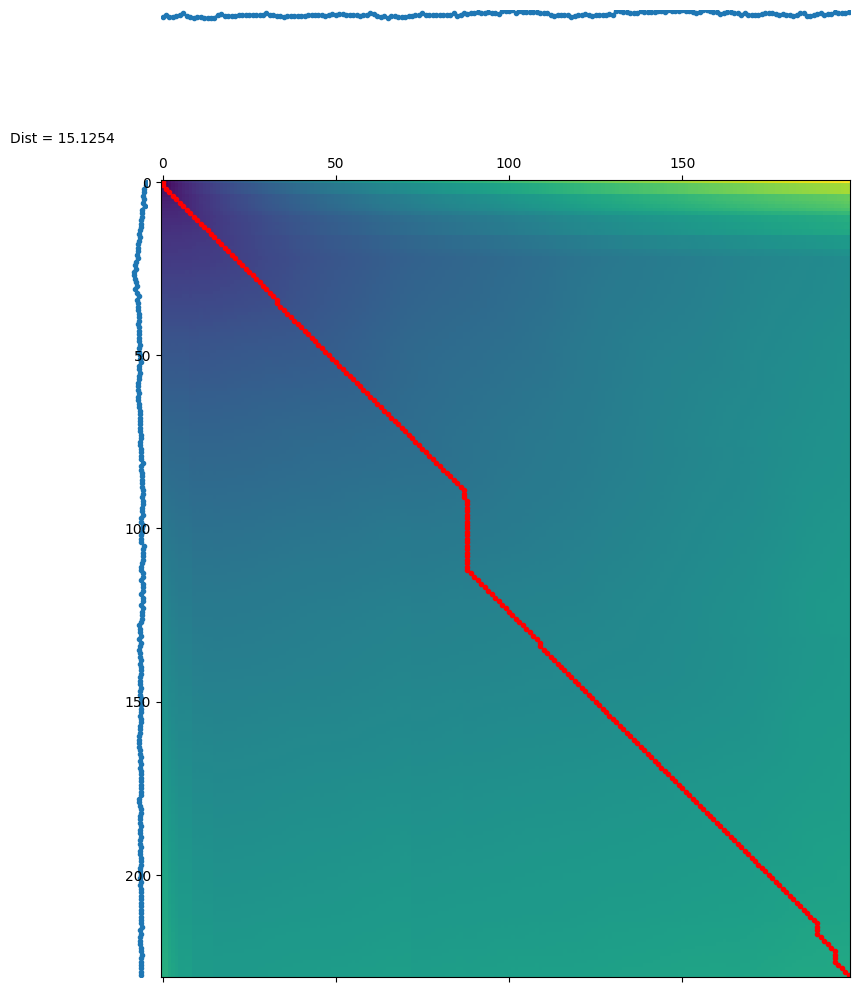

In [144]:
s2 = dtwKp2Hand[:, 0, 0]
s1 = dtwKp1Hand[:, 0, 0]
dtwvis.plot_warpingpaths(s1, s2, paths, best_path_Hand)
plt.savefig("warpingpaths.png", dpi=300, bbox_inches='tight')

In [99]:
best_path_Hand

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 35),
 (37, 36),
 (38, 37),
 (39, 38),
 (40, 39),
 (41, 40),
 (42, 41),
 (43, 42),
 (44, 43),
 (45, 44),
 (46, 45),
 (47, 46),
 (48, 47),
 (49, 48),
 (50, 49),
 (51, 50),
 (52, 51),
 (53, 52),
 (54, 53),
 (55, 54),
 (56, 55),
 (57, 56),
 (58, 57),
 (59, 57),
 (60, 57),
 (61, 57),
 (62, 58),
 (63, 59),
 (64, 60),
 (65, 61),
 (66, 62),
 (67, 63),
 (68, 64),
 (69, 65),
 (70, 66),
 (71, 66),
 (72, 66),
 (73, 67),
 (74, 68),
 (75, 69),
 (76, 70),
 (77, 71),
 (78, 72),
 (79, 73),
 (80, 74),
 (81, 75),
 (82, 75),
 (83, 75),
 (84, 75),
 (85, 75),
 (86, 75),
 (87, 75),
 (88, 75),
 (89, 75),
 (90, 75),
 (91, 75),
 (92, 75

In [125]:

def SimiLarRIGHTLegPose(img, bPath, cor):
    
    if img is None:
        return None
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # Recolor image to RGB
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #print(results.pose_landmarks.landmark)

        # Create an empty NormalizedLandmarkList object
        landmark_list = mp.framework.formats.landmark_pb2.NormalizedLandmarkList()

        # Create 22 NormalizedLandmark objects
        for _ in range(33):
            landmark = landmark_list.landmark.add()
            landmark.Clear()
            landmark.x = 0
            landmark.y = 0
            landmark.z = 0
            landmark.visibility = 0

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility

        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z
        landmark_list.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].visibility

        if cor == 0:
                    # Render detections
            mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(0,0,255), thickness=4, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(0,0,255), thickness=4, circle_radius=2)
            )
        elif cor == 1:
            
            mp_drawing.draw_landmarks(image, landmark_list, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(50,205,50), thickness=4, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(50,205,50), thickness=4, circle_radius=2)
            )
            

        return image



In [145]:
cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)
size1 = (400,600)
size2 = (1200,600)
out1 = cv2.VideoWriter('similarKp1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, size2) # Output video
out2 = cv2.VideoWriter('similarKp2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, size2) # Output video

cpt = 0
reset = 0
cor = 1
bPath = best_path_Hand

while True:

    
    success, img1 = cap1.read()
    success1, img2 = cap2.read()
    
   

    if  img1 is None:
        print("img1 break")
        break

    if  img2 is None:
        print("img2 break")
        break

    
    if bPath[cpt][1] == bPath[cpt-1][1] or bPath[cpt-1][0] == bPath[cpt][0]:
        reset = reset + 1
        cor = 0
    else:
        print(bPath[cpt])
        cor = 1
        cpt = cpt + reset
        reset = 0
        

    
    img1 = SimiLarRIGHTLegPose(img1, best_path_Hand, cor)
    img2 = SimiLarRIGHTLegPose(img2, best_path_Hand, cor)

    img1 = cv2.resize(img1, size2) 
    img2 = cv2.resize(img2, size2) 

    out1.write(img1)
    out2.write(img2)

    cpt = cpt + 1
    cv2.imshow('Mediapipe Feed1', img1)
    cv2.imshow('Mediapipe Feed2', img2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap1.release()
cap2.release()
out1.release()
out2.release()
cv2.destroyAllWindows()


(0, 0)
(2, 1)
(4, 3)
(5, 4)
(6, 5)
(7, 6)
(8, 7)
(9, 8)
(10, 9)
(11, 10)
(12, 11)
(13, 12)
(14, 13)
(15, 14)
(16, 15)
(17, 16)
(18, 17)
(19, 18)
(20, 19)
(21, 20)
(22, 21)
(23, 22)
(24, 23)
(25, 24)
(26, 25)
(27, 26)
(28, 27)
(29, 28)
(30, 29)
(31, 30)
(32, 31)
(33, 32)
(34, 33)
(36, 34)
(38, 36)
(39, 37)
(40, 38)
(41, 39)
(42, 40)
(43, 41)
(44, 42)
(45, 43)
(46, 44)
(47, 45)
(48, 46)
(49, 47)
(50, 48)
(51, 49)
(52, 50)
(53, 51)
(54, 52)
(55, 53)
(56, 54)
(57, 55)
(58, 56)
(59, 57)
(60, 58)
(61, 59)
(62, 60)
(63, 61)
(64, 62)
(65, 63)
(66, 64)
(67, 65)
(68, 66)
(69, 67)
(70, 68)
(71, 69)
(72, 70)
(73, 71)
(74, 72)
(75, 73)
(76, 74)
(77, 75)
(78, 76)
(79, 77)
(80, 78)
(81, 79)
(82, 80)
(83, 81)
(84, 82)
(85, 83)
(86, 84)
(87, 85)
(88, 86)
(89, 87)
(92, 88)
(113, 89)
(132, 108)
(133, 109)
(135, 110)
(137, 112)
(138, 113)
(139, 114)
(140, 115)
(141, 116)
(142, 117)
(143, 118)
(144, 119)
(145, 120)
(146, 121)
(147, 122)
(148, 123)
(149, 124)
(150, 125)
(151, 126)
(152, 127)
(153, 128)
(154